In [1]:
#montar drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Preprocesamiento de imágenes y aumentación de datos



---



Librería imbalanced-learn

La librería imbalanced-learn es una herramienta valiosa para el aprendizaje automático cuando se trabaja con conjuntos de datos que presentan un desequilibrio significativo entre las clases. Este desequilibrio puede afectar negativamente el rendimiento de los modelos de aprendizaje automático, especialmente en tareas de clasificación.

In [ ]:
%%capture
!pip install imbalanced-learn

Beneficios:

Mejora la precisión del modelo: Al balancear el conjunto de datos, se reduce el sesgo hacia la clase mayoritaria, lo que puede conducir a un mejor rendimiento del modelo en la clasificación de la clase minoritaria.
Evita la sobreestimación de la clase mayoritaria: Los modelos entrenados con datos desbalanceados pueden tender a sobrestimar la clase mayoritaria, ignorando la clase minoritaria. El balanceo de datos ayuda a corregir este problema.
Facilita la interpretación del modelo: Cuando las clases están balanceadas, es más fácil interpretar los resultados del modelo y comprender su comportamiento en ambas clases.

Aplicaciones:

Detección de fraude: En conjuntos de datos de fraude financiero, la clase minoritaria suele ser la de transacciones fraudulentas. El balanceo de datos puede mejorar la capacidad del modelo para detectar estas transacciones.
Diagnóstico médico: En conjuntos de datos médicos, la clase minoritaria puede ser la de pacientes con una enfermedad rara. El balanceo de datos puede ayudar al modelo a identificar con mayor precisión estos casos.
Análisis de sentimientos: En conjuntos de datos de análisis de sentimientos, la clase minoritaria puede ser la de opiniones negativas o positivas. El balanceo de datos puede mejorar la capacidad del modelo para clasificar correctamente estos sentimientos.

Código para Preprocesar y Balancear los Datos

códigos para los cuatro modelos (VGG16, VGG19, CNN personalizada y Sequential simple).


# Descripción del proceso de procesamiento que se aplicara a todos los modelos por igual

Este código preprocesa y balancea un conjunto de datos de imágenes para una tarea de aprendizaje automático, de clasificación de imágenes. Se enfoca específicamente en el desequilibrio de clases, donde una clase tiener significativamente menos imágenes que otra.


#Análisis detallado

Importación de bibliotecas:

os: Se utiliza para interactuar con el sistema operativo (crear directorios, etc.).

shutil: Útil para copiar archivos (utilizado para datos de validación balanceados).

imblearn.over_sampling: Proporciona la clase RandomOverSampler para sobremuestrear la clase minoritaria.

sklearn.utils: Ofrece utilidades como shuffle (utilizado para barajar datos más adelante).

numpy: Esencial para operaciones numéricas (manipulación de matrices).
tensorflow.keras.preprocessing.image: Proporciona funciones para cargar y preprocesar imágenes.

tensorflow: La biblioteca central de TensorFlow para construir y entrenar modelos de aprendizaje automático.


Definición de rutas de directorio:

train_dir, val_dir, test_dir: Rutas a los directorios originales de entrenamiento, validación y prueba.

balanced_train_dir, balanced_val_dir, balanced_test_dir: Rutas a los directorios balanceados creados.


Establecer el tamaño de la imagen:

img_size: Define el tamaño de imagen deseado (por ejemplo, 128x128 píxeles) para el procesamiento.


Crear directorios balanceados:

os.makedirs: Asegura que los directorios balanceados existan, creándolos si es necesario. Se crean subdirectorios separados para las clases 'normal' y 'pneumonia' dentro de cada directorio balanceado.


Función: load_images_and_labels:

Toma el directorio de origen (src_dir) y la categoría como entrada.

Lee los nombres de archivo del directorio de la categoría especificada.


Itera a través de los nombres de archivo:

Construye la ruta completa de la imagen (img_path).

Carga la imagen usando img_to_array y load_img, redimensionando a img_size.

Agrega la imagen y la etiqueta de categoría a las listas respectivas.

Devuelve las listas de imágenes y etiquetas.


Cargar y combinar datos de entrenamiento:

Llama a load_images_and_labels para las clases 'normal' y 'pneumonia' en el directorio de entrenamiento.

Concatena las listas de imágenes y etiquetas de ambas clases.

Convertir etiquetas a valores numéricos:

Utiliza np.where para convertir eficientemente las etiquetas 'normales' a 0 y las etiquetas 'pneumonia' a 1.


Sobremuestreo para balancear clases:

Crea un objeto RandomOverSampler con random_state=42 para reproducibilidad.

Cambia la forma de las imágenes en una matriz unidimensional para el sobremuestreo.

Aplica ros.fit_resample para sobremuestrear la clase minoritaria (probablemente 'pneumonia').

Cambia la forma de las imágenes sobremuestreadas a sus dimensiones originales.


Función: save_images:

Toma imágenes, etiquetas y el directorio de destino como entrada.


Itera a través de las imágenes:

Determina la categoría en base a la etiqueta (0 para 'normal', 1 para 'pneumonia').

Cambia la forma de la imagen si es necesario.

Construye la ruta de la imagen de salida con la categoría y un índice único.

Guarda la imagen usando tf.keras.preprocessing.image.save_img.


Guardar imágenes de entrenamiento balanceadas:

Llama a save_images para guardar las imágenes y etiquetas de entrenamiento sobremuestreadas en balanced_train_dir.


Balancear datos de validación (ya balanceados):

Recorre las categorías 'normal' y 'pneumonia'.

Copia todos los archivos de imagen del directorio de validación original al directorio de validación balanceado para mantener la coherencia.


Balancear datos de prueba:

Similar a los datos de entrenamiento, carga y combina imágenes/etiquetas

#Preprocesamiento

In [4]:
import os
import shutil
from imblearn.over_sampling import RandomOverSampler
from sklearn.utils import shuffle
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import tensorflow as tf

# Definir las rutas de las carpetas originales y las nuevas carpetas balanceadas
train_dir = '/content/drive/MyDrive/BOOTCAMP_DATA_SCIENCE/PROYECTO_7/DATA_CLEAN/train'
val_dir = '/content/drive/MyDrive/BOOTCAMP_DATA_SCIENCE/PROYECTO_7/DATA_CLEAN/val'
test_dir = '/content/drive/MyDrive/BOOTCAMP_DATA_SCIENCE/PROYECTO_7/DATA_CLEAN/test'

balanced_train_dir = '/content/drive/MyDrive/BOOTCAMP_DATA_SCIENCE/PROYECTO_7/DATA_CLEAN_BALANCED/train'
balanced_val_dir = '/content/drive/MyDrive/BOOTCAMP_DATA_SCIENCE/PROYECTO_7/DATA_CLEAN_BALANCED/val'
balanced_test_dir = '/content/drive/MyDrive/BOOTCAMP_DATA_SCIENCE/PROYECTO_7/DATA_CLEAN_BALANCED/test'

# Definir tamaño de imagen
img_size = 128

# Crear directorios balanceados
os.makedirs(balanced_train_dir, exist_ok=True)
os.makedirs(balanced_val_dir, exist_ok=True)
os.makedirs(balanced_test_dir, exist_ok=True)

for category in ['normal', 'pneumonia']:
    os.makedirs(os.path.join(balanced_train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(balanced_val_dir, category), exist_ok=True)
    os.makedirs(os.path.join(balanced_test_dir, category), exist_ok=True)

# Función para cargar imágenes y etiquetas
def load_images_and_labels(src_dir, category):
    filenames = os.listdir(os.path.join(src_dir, category))
    images = []
    labels = []
    for filename in filenames:
        img_path = os.path.join(src_dir, category, filename)
        img = img_to_array(load_img(img_path, target_size=(img_size, img_size)))
        images.append(img)
        labels.append(category)
    return images, labels

# Cargar y combinar datos de entrenamiento
normal_images, normal_labels = load_images_and_labels(train_dir, 'normal')
pneumonia_images, pneumonia_labels = load_images_and_labels(train_dir, 'pneumonia')

images = np.array(normal_images + pneumonia_images)
labels = np.array(normal_labels + pneumonia_labels)

# Convertir etiquetas a números
labels = np.where(labels == 'normal', 0, 1)

# Sobremuestreo para balancear las clases
ros = RandomOverSampler(random_state=42)
images_resampled, labels_resampled = ros.fit_resample(images.reshape(-1, img_size * img_size * 3), labels)
images_resampled = images_resampled.reshape(-1, img_size, img_size, 3)

# Guardar imágenes balanceadas
def save_images(images, labels, dest_dir):
    for i, img in enumerate(images):
        category = 'normal' if labels[i] == 0 else 'pneumonia'
        img = img.reshape(img_size, img_size, 3)
        img_path = os.path.join(dest_dir, category, f'{category}_{i}.jpeg')
        tf.keras.preprocessing.image.save_img(img_path, img)

save_images(images_resampled, labels_resampled, balanced_train_dir)

# Balancear datos de validación (ya están balanceados)
for category in ['normal', 'pneumonia']:
    for filename in os.listdir(os.path.join(val_dir, category)):
        shutil.copy(os.path.join(val_dir, category, filename), os.path.join(balanced_val_dir, category, filename))

# Balancear datos de prueba
normal_images, normal_labels = load_images_and_labels(test_dir, 'normal')
pneumonia_images, pneumonia_labels = load_images_and_labels(test_dir, 'pneumonia')

images = np.array(normal_images + pneumonia_images)
labels = np.array(normal_labels + pneumonia_labels)
labels = np.where(labels == 'normal', 0, 1)

images_resampled, labels_resampled = ros.fit_resample(images.reshape(-1, img_size * img_size * 3), labels)
images_resampled = images_resampled.reshape(-1, img_size, img_size, 3)

save_images(images_resampled, labels_resampled, balanced_test_dir)

print("Datos preprocesados y balanceados.")


Datos preprocesados y balanceados.


#Detalle de Imagnes despues de aplicar el proceso de Prerpocesamiento

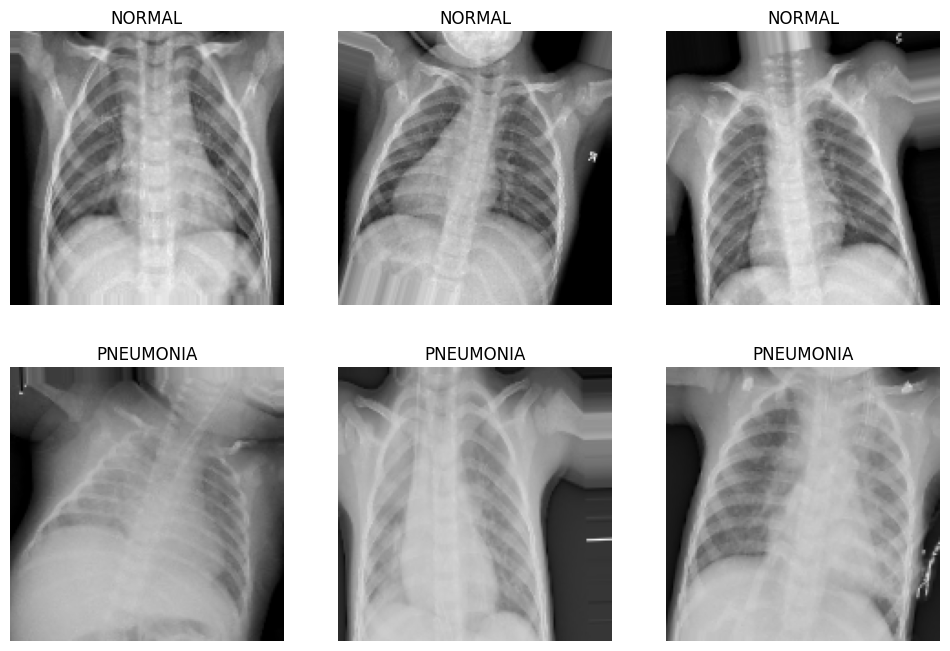

In [ ]:
import matplotlib.pyplot as plt

# Mostrar imágenes de entrenamiento
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Mostrar 3 imágenes de la clase NORMAL
i = 0
for imgs, labels in train_generator: # Note the change here to reflect the batch nature
    for img, label in zip(imgs, labels): # Iterate through individual images and labels within the batch
        if label == 0:
            axs[0, i].imshow(img)
            axs[0, i].axis('off')
            axs[0, i].set_title('NORMAL')
            i += 1
        if i == 3:
            break
    if i == 3: # Break the outer loop as well once 3 images are found
        break

# Mostrar 3 imágenes de la clase PNEUMONIA
i = 0
for imgs, labels in train_generator:
    for img, label in zip(imgs, labels):
        if label == 1:
            axs[1, i].imshow(img)
            axs[1, i].axis('off')
            axs[1, i].set_title('PNEUMONIA')
            i += 1
        if i == 3:
            break
    if i == 3:
        break

plt.show()

# (Similar changes for validation_generator)

La imagen muestra seis radiografías de tórax, tres normales y tres con neumonía, como resultado de un procesamiento de imágenes que incluyó las siguientes etapas:

Importación de bibliotecas: Uso de os, shutil, imblearn.over_sampling, sklearn.utils, numpy, tensorflow.keras.preprocessing.image y tensorflow.

Definición de rutas de directorio: Configuración de rutas para datos de entrenamiento, validación y prueba, tanto originales como balanceados.

Establecimiento del tamaño de imagen: Redimensionado de imágenes a un tamaño uniforme (por ejemplo, 128x128 píxeles).

Creación de directorios balanceados: Creación de directorios organizados para datos balanceados.

Carga y procesamiento de imágenes:

Función load_images_and_labels para cargar y etiquetar imágenes.
Conversión de etiquetas a valores numéricos.

Sobremuestreo para balancear clases: Uso de RandomOverSampler para equilibrar la cantidad de imágenes en cada clase.

Guardado de imágenes balanceadas: Función save_images para guardar las imágenes balanceadas en los directorios correspondientes.

Balanceo de datos de validación y prueba: Copia y combinación de datos para mantener la coherencia entre conjuntos de datos.